In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("mobile_addiction_cleaned.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13318 entries, 0 to 13317
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Entry number        13318 non-null  int64 
 1   daily_screen_time   13318 non-null  int64 
 2   app_sessions        13318 non-null  int64 
 3   social_media_usage  13318 non-null  int64 
 4   gaming_time         13318 non-null  int64 
 5   notifications       13318 non-null  int64 
 6   night_usage         13318 non-null  int64 
 7   age                 13318 non-null  int64 
 8   work_study_hours    13318 non-null  int64 
 9   stress_level        13318 non-null  int64 
 10  apps_installed      13318 non-null  int64 
 11  addicted            13318 non-null  object
dtypes: int64(11), object(1)
memory usage: 1.2+ MB


In [2]:
df.drop("Entry number", axis=1, inplace=True)

In [23]:
#check if classes are balanced
print(df["addicted"].value_counts())

#check correlation of each feature with target label
df["addicted"] = LabelEncoder().fit_transform(df["addicted"])
correlations = df.corr(numeric_only=True)["addicted"].sort_values(ascending=False)
print(correlations)

addicted
1    6735
0    6583
Name: count, dtype: int64
addicted              1.000000
age                   0.368345
work_study_hours      0.248548
gaming_time          -0.363429
night_usage          -0.370746
daily_screen_time    -0.382195
social_media_usage   -0.389654
apps_installed       -0.429306
stress_level         -0.535303
app_sessions         -0.672264
notifications        -0.793208
Name: addicted, dtype: float64


In [7]:
feature_cols = [
    "daily_screen_time",
    "app_sessions",
    "social_media_usage",
    "gaming_time",
    "notifications",
    "night_usage",
    "age",
    "stress_level",
    "apps_installed"
]
X = df[feature_cols]    #features to be used in training
y = df["addicted"]      #label of each data point

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
#normalize data points
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [39]:
y_pred = knn.predict(X_test_scaled)    #predict labels for each data point
y_proba = knn.predict_proba(X_test_scaled)[:, 1]  #get probabilites of a data point being in each class

KNN Classifier Results:

Accuracy: 0.9542042042042042

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1312
           1       0.96      0.95      0.95      1352

    accuracy                           0.95      2664
   macro avg       0.95      0.95      0.95      2664
weighted avg       0.95      0.95      0.95      2664


Confusion Matrix:
 [[1252   60]
 [  62 1290]]


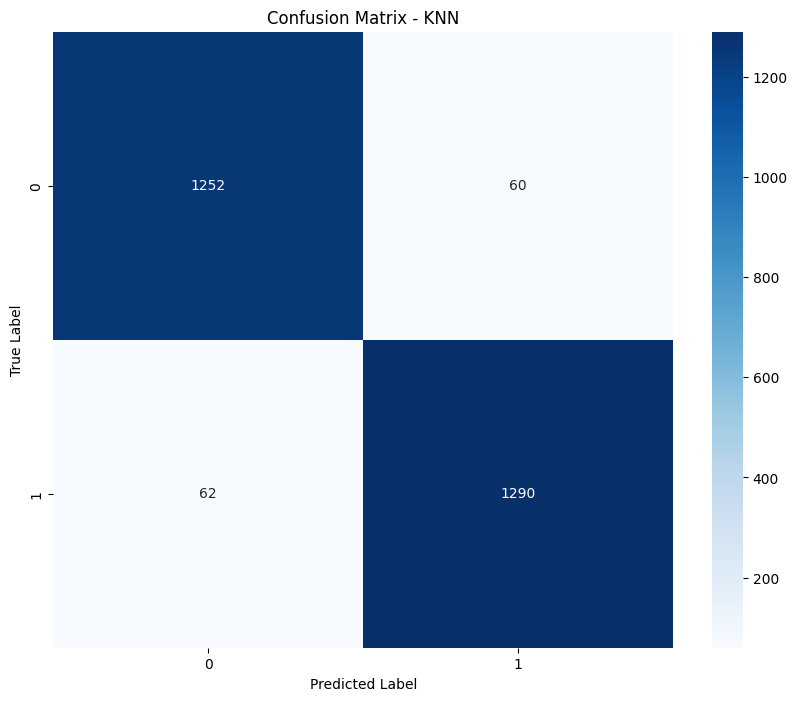

In [57]:
print("KNN Classifier Results:\n")
print("Accuracy:", accuracy_score(y_test, y_pred))   #compare with true labels
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

#plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='.0f')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

AUC Score: 0.9542051522586232


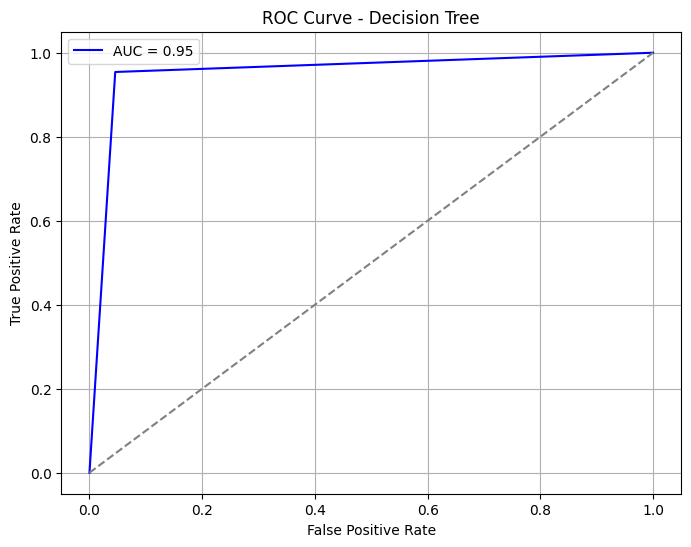

In [58]:
#Compute AUC score
auc_score = roc_auc_score(y_test, y_proba)
print("AUC Score:", auc_score)

#Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.grid(True)
plt.show()

In [60]:
#calculate AUC score for 5 folds of data
scores = cross_val_score(knn, X, y, cv=5, scoring='roc_auc')
print("Cross-validated AUC scores:", scores)
print("Mean AUC:", scores.mean())   #get mean of scores

Cross-validated AUC scores: [0.98970546 0.98891769 0.98925929 0.99014443 0.98855077]
Mean AUC: 0.9893155297642909


In [55]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [56]:
y_pred = dt_model.predict(X_test)  #predict labels for each data point
y_proba = dt_model.predict_proba(X_test)[:, 1]   #get probabilites of a data point being in each class

Decision Tree Classifier Results:

Accuracy: 0.9542042042042042
Confusion Matrix:
 [[1252   60]
 [  62 1290]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1312
           1       0.96      0.95      0.95      1352

    accuracy                           0.95      2664
   macro avg       0.95      0.95      0.95      2664
weighted avg       0.95      0.95      0.95      2664



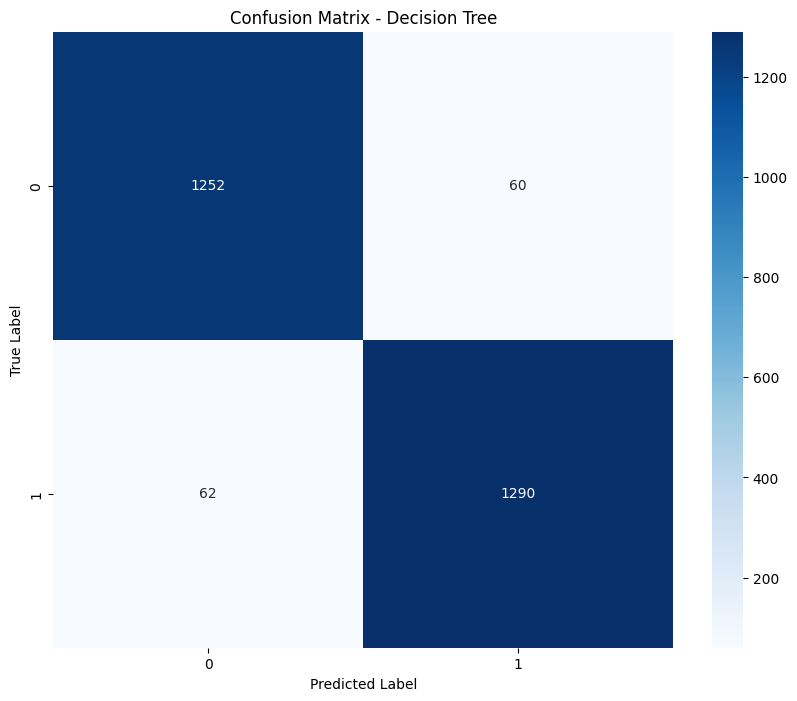

In [61]:
print("Decision Tree Classifier Results:\n")
print("Accuracy:", accuracy_score(y_test, y_pred))  #compare with true labels
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='.0f')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

AUC Score: 0.9542051522586232


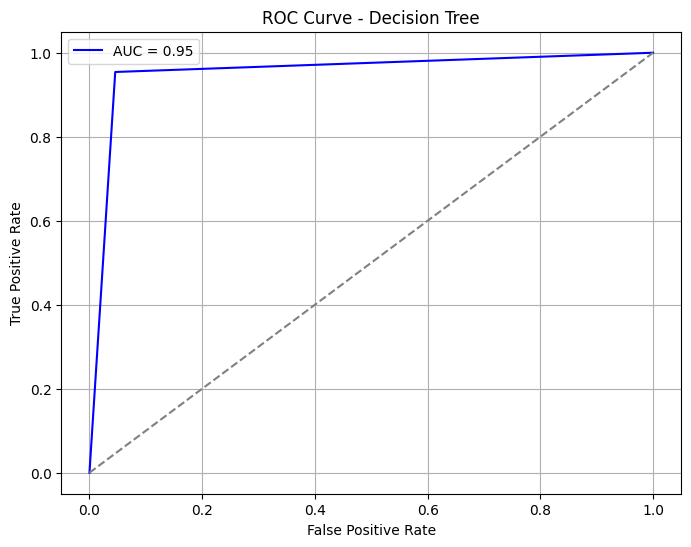

In [53]:
# Compute AUC score
auc_score = roc_auc_score(y_test, y_proba)
print("AUC Score:", auc_score)

#Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
#calculate AUC score for 5 folds of data
scores = cross_val_score(dt_model, X, y, cv=5, scoring='roc_auc')
print("Cross-validated AUC scores:", scores)
print("Mean AUC:", scores.mean())   #get mean of scores

Cross-validated AUC scores: [0.95608819 0.95882185 0.95188667 0.95520694 0.96352189]
Mean AUC: 0.9571051085976443
